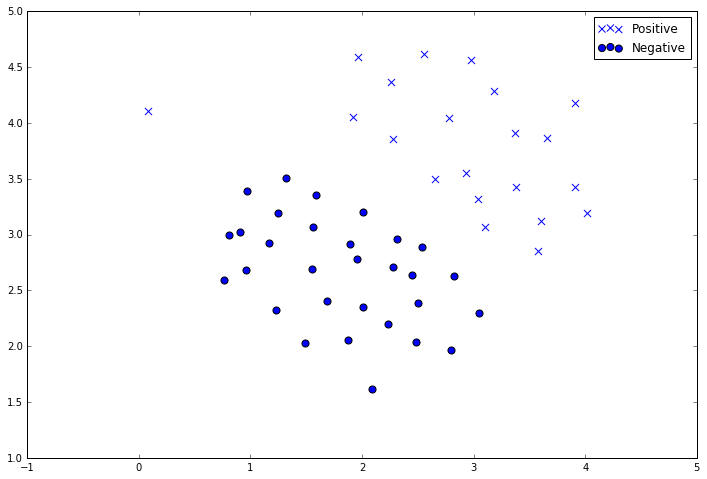

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import exp
from scipy.io import loadmat
from scipy.spatial.distance import pdist, squareform

raw_data = loadmat('ex6data1.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1','X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')  
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')  
ax.legend() 

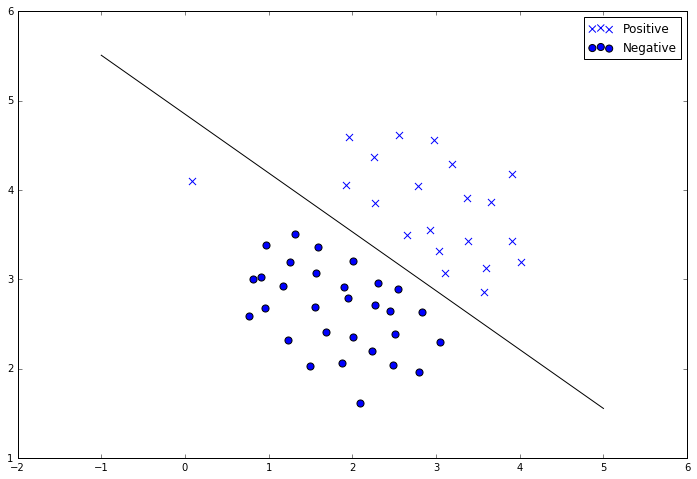

In [3]:
X,y = raw_data['X'], raw_data['y']
clf = svm.SVC(kernel='linear')
clf.fit(X,np.ravel(y)) #column_or_1d(y, warn=True))

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')  
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative') 
ax.plot(xx, yy, 'k-')
ax.legend()

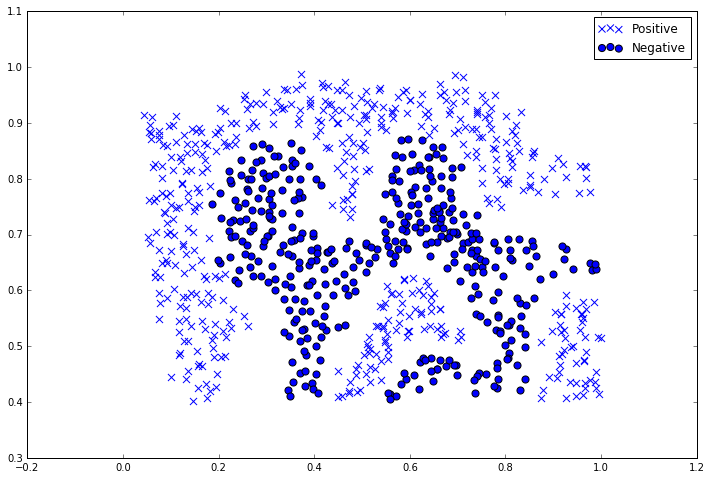

In [6]:
raw_data2 = loadmat('ex6data2.mat')

data = pd.DataFrame(raw_data2['X'], columns=['X1','X2'])
data['y'] = raw_data2['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')  
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')  
ax.legend()

"positive = data[data['y'].isin([1])]\nnegative = data[data['y'].isin([0])]\n\nfig, ax = plt.subplots(figsize=(12,8))  \nax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')  \nax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative') \n\nx_min, x_max = -0.2,1.2#X[:, 0].min() - 1, X[:, 0].max() + 1\ny_min, y_max = 0.3,1.1#X[:, 1].min() - 1, X[:, 1].max() + 1\nxx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\n                     np.arange(y_min, y_max, 0.1))\nZ = clf.predict(np.c_[xx.ravel(), yy.ravel()])\nZ = Z.reshape(xx.shape)\nax.contourf(xx, yy, Z, alpha=0.5)"

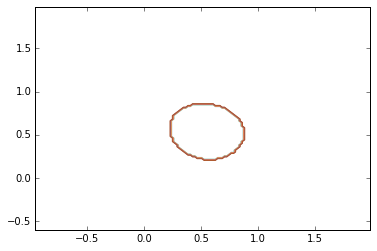

In [24]:
X,Y = raw_data2['X'], raw_data2['y']
clf = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)
clf.fit(X,np.ravel(Y)) #column_or_1d(y, warn=True))

h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figure=)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

"""positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')  
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative') 

x_min, x_max = -0.2,1.2#X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = 0.3,1.1#X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.5)"""